## PANDAS

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from subprocess import check_output
import seaborn as sns
import sys

In [2]:
# We load the CSV file
sharks= pd.read_csv("C:/Users/AaronElias/Desktop/ironHack/attacks.csv", encoding = "ISO-8859-1")


# I renamed the column Case_Number
sharks.rename(columns={"Case Number":"Case_Number"}, inplace=True)
sharks.rename(columns={"Sex ":"Sex"}, inplace=True)

#we drop all the columns that I will not use for my project
sharks.drop(columns=['Unnamed: 22','Unnamed: 23',"href","href formula","pdf","original order","Time","Investigator or Source","Case Number.1","Case Number.2","Type","Age","Fatal (Y/N)","Name","Species "], inplace=True)
sharks.drop(columns=["Case_Number"], inplace= True)



## I will replace all the NaN values for no info

In [5]:
sharks['Country'] = sharks['Country'].fillna('No info')
sharks['Activity'] = sharks['Activity'].fillna('No info')
sharks['Injury'] = sharks['Injury'].fillna('No info')
sharks['Area'] = sharks['Area'].fillna('No info')
sharks['Location'] = sharks['Location'].fillna('No info')
sharks['Year'] = sharks['Year'].fillna('No info')
sharks['Sex'] = sharks['Sex'].fillna('No info')
sharks['Date'] = sharks['Date'].fillna('No date')

#I will change the Injury tex to lower case
sharks["Injury"]=sharks["Injury"].str.lower()


## Cleanning the column Date

In [6]:
#I Took out all the data that contains more info that i specified with the regular expression
sharks['Date']=sharks['Date'].str.extract(r"(\d{2}-[A-z]{3}-\d{4})")

#I go some null values and I eliminated them with a dropna
sharks.dropna(inplace=True)

## I cleaned the Year column

In [8]:
#I eliminated the 0 values from this colum
sharks.drop(sharks[sharks.Year == "No info"].index, inplace=True)

sharks.drop(sharks[sharks.Year == 0.0].index, inplace=True)


## Cleanning Area Column

In [9]:
sharks.drop(sharks[sharks.Area == "No info"].index, inplace=True)
sharks["Area"]=sharks["Area"].replace("¿","").replace("?","").replace(",","")


## Column Location

In [10]:
sharks.drop(sharks[sharks.Location == "No info"].index, inplace=True)


## Activity Column

In [11]:
sharks.drop(sharks[sharks.Activity == "No info"].index, inplace=True)
sharks['Activity'].value_counts()


Surfing                                    918
Swimming                                   719
Fishing                                    327
Spearfishing                               238
Wading                                     129
                                          ... 
Fishing in waist-deep water                  1
Fell overboard while fishing for sharks      1
Playing in the surf with his 2 dogs          1
Standing / Wading                            1
Diving for sinkers                           1
Name: Activity, Length: 1088, dtype: int64

## Sex Column

In [12]:
sharks.drop(sharks[sharks.Sex == "No info"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "N"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "lli"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "."].index, inplace=True)
sharks["Sex"]=sharks["Sex"].str.strip()
sharks['Sex'].value_counts()



M    3737
F     511
Name: Sex, dtype: int64

## Country Column

In [13]:
sharks.drop(sharks[sharks.Country == "No info"].index, inplace=True)

sharks["Country"]= sharks.Country.str.replace('\&', 'and').str.strip()
sharks["Country"]= sharks.Country.replace('\/.+|\(.+\)|\.|\?', '')
sharks["Country"].replace("ST HELENA, British overseas territory","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("ENGLAND","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("BRITISH ISLES","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("OKINAWA","JAPAN",inplace=True)
sharks["Country"].replace("AZORES","PORTUGAL",inplace=True)
sharks["Country"].replace("RED SEA","EGYPT",inplace=True)
sharks["Country"].replace("NEW BRITAIN","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("NEW GUINEA","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("BRITISH NEW GUINEA","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("ADMIRALTY ISLANDS","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("FEDERATED STATES OF MICRONESIA","MICRONESIA",inplace=True)
sharks["Country"].replace("COLUMBIA","COLOMBIA",inplace=True)
sharks["Country"]=sharks["Country"].str.title()
sharks["Country"].unique()
sharks["Country"].value_counts().head(10)

Usa                 1824
Australia           1011
South Africa         448
New Zealand           92
Brazil                84
Papua New Guinea      62
Bahamas               56
Mexico                50
Reunion               34
Italy                 33
Name: Country, dtype: int64

## Injury column

In [14]:
sharks["Injury"]= sharks.Injury.str.replace('\&', 'and')
sharks['Injury'].value_counts()
len(sharks["Injury"])

4246

In [25]:
# This shows the shape of or data frame
print(sharks.shape)
#This will show the columns of the data frame
print(sharks.columns)
for x in sharks["Date"]:
    

(4246, 8)
Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Sex',
       'Injury'],
      dtype='object')
25-Jun-2018
18-Jun-2018
09-Jun-2018
08-Jun-2018
04-Jun-2018
03-Jun-2018
03-Jun-2018
27-May-2018
26-May-2018
26-May-2018
24-May-2018
21-May-2018
13-May-2018
13-May-2018
12-May-2018
09-May-2018
30-Apr-2018
28-Apr-2018
28-Apr-2018
25-Apr-2018
25-Apr-2018
24-Apr-2018
23-Apr-2018
22-Apr-2018
19-Apr-2018
15-Apr-2018
15-Apr-2018
15-Apr-2018
15-Apr-2018
14-Apr-2018
10-Apr-2018
03-Apr-2018
31-Mar-2018
14-Mar-2018
24-Feb-2018
23-Feb-2018
18-Feb-2018
15-Feb-2018
14-Feb-2018
11-Feb-2018
03-Feb-2018
01-Feb-2018
14-Jan-2018
13-Jan-2018
12-Jan-2018
05-Jan-2018
31-Dec-2017
30-Dec-2017
21-Dec-2017
30-Nov-2017
30-Nov-2017
24-Nov-2017
18-Nov-2017
13-Nov-2017
04-Nov-2017
31-Oct-2017
28-Oct-2017
26-Oct-2017
23-Oct-2017
23-Oct-2017
23-Oct-2017
22-Oct-2017
21-Oct-2017
18-Oct-2017
09-Oct-2017
05-Oct-2017
01-Oct-2017
25-Sep-2017
25-Sep-2017
24-Sep-2017
24-Sep-2017
20-Sep-2017
16-Sep-2017
1

21-May-2006
19-May-2006
04-May-2006
02-May-2006
21-Apr-2006
19-Apr-2006
13-Apr-2006
11-Apr-2006
09-Apr-2006
09-Apr-2006
03-Apr-2006
28-Mar-2006
23-Mar-2006
22-Mar-2006
18-Mar-2006
15-Mar-2006
27-Feb-2006
23-Feb-2006
13-Feb-2006
12-Feb-2006
12-Feb-2006
08-Feb-2006
01-Feb-2006
01-Feb-2006
25-Jan-2006
18-Jan-2006
15-Jan-2006
11-Jan-2006
07-Jan-2006
04-Jan-2006
01-Jan-2006
24-Dec-2005
21-Dec-2005
11-Dec-2005
29-Nov-2005
27-Nov-2005
25-Nov-2005
25-Nov-2005
21-Nov-2005
20-Nov-2005
15-Nov-2005
12-Nov-2005
02-Nov-2005
02-Nov-2005
29-Oct-2005
25-Oct-2005
22-Oct-2005
21-Oct-2005
19-Oct-2005
15-Oct-2005
13-Oct-2005
11-Oct-2005
06-Oct-2005
03-Oct-2005
01-Oct-2005
27-Sep-2005
24-Sep-2005
23-Sep-2005
22-Sep-2005
20-Sep-2005
11-Sep-2005
07-Sep-2005
05-Sep-2005
04-Sep-2005
02-Sep-2005
24-Aug-2005
24-Aug-2005
22-Aug-2005
21-Aug-2005
19-Aug-2005
12-Aug-2005
27-Jul-2005
23-Jul-2005
22-Jul-2005
17-Jul-2005
15-Jul-2005
13-Jul-2005
27-Jun-2005
25-Jun-2005
22-Jun-2005
20-Jun-2005
18-Jun-2005
16-Jun-2005
13-J

03-Oct-1986
05-Oct-1986
10-Aug-1986
03-Aug-1986
18-May-1986
20-Apr-1986
18-Mar-1986
15-Mar-1986
18-Feb-1986
17-Feb-1986
07-Feb-1986
06-Feb-1986
01-Feb-1986
12-Jan-1986
22-Dec-1985
11-Nov-1985
03-Nov-1985
24-Oct-1985
22-Oct-1985
18-Oct-1985
12-Oct-1985
05-Oct-1985
28-Sep-1985
08-Sep-1985
08-Sep-1985
05-Sep-1985
22-Aug-1985
20-Aug-1985
17-Aug-1985
25-Jul-1985
25-Jul-1985
19-Jul-1985
26-May-1985
08-May-1985
16-Mar-1985
03-Mar-1985
18-Feb-1985
03-Feb-1985
27-Jan-1985
17-Jan-1985
04-Jan-1985
30-Nov-1984
11-Nov-1984
04-Nov-1984
21-Oct-1984
21-Oct-1984
17-Oct-1984
14-Oct-1984
30-Sep-1984
30-Sep-1984
23-Sep-1984
22-Sep-1984
17-Sep-1984
15-Sep-1984
11-Sep-1984
24-Aug-1984
24-Jul-1984
24-Jul-1984
22-Jul-1984
15-Jun-1984
03-Jun-1984
03-Jun-1984
31-May-1984
14-Mar-1984
10-Mar-1984
18-Feb-1984
17-Feb-1984
11-Feb-1984
05-Jan-1984
25-Dec-1983
24-Dec-1983
22-Dec-1983
21-Dec-1983
10-Nov-1983
10-Nov-1983
17-Oct-1983
13-Oct-1983
04-Sep-1983
20-Aug-1983
20-Aug-1983
15-Aug-1983
13-Aug-1983
13-Aug-1983
26-J

23-Jan-1952
07-Jan-1952
21-Dec-1951
16-Dec-1951
29-Nov-1951
28-Nov-1951
28-Nov-1951
22-Oct-1951
29-Sep-1951
03-Sep-1951
02-Sep-1951
17-Aug-1951
17-Aug-1951
16-Aug-1951
25-Jun-1951
26-Mar-1951
24-Mar-1951
15-Mar-1951
19-Feb-1951
03-Feb-1951
01-Feb-1951
21-Jan-1951
31-Dec-1950
16-Dec-1950
29-Nov-1950
25-Nov-1950
12-Nov-1950
28-Oct-1950
04-Oct-1950
06-Aug-1950
21-Jul-1950
10-Jul-1950
25-Jun-1950
06-Jun-1950
24-May-1950
01-May-1950
09-Apr-1950
09-Apr-1950
26-Mar-1950
08-Mar-1950
01-Mar-1950
18-Feb-1950
11-Feb-1950
16-Jan-1950
12-Jan-1950
20-Nov-1949
12-Nov-1949
28-Aug-1949
28-Aug-1949
17-Aug-1949
16-Aug-1949
10-Aug-1949
28-Jul-1949
25-Jul-1949
16-Jul-1949
16-May-1949
13-May-1949
18-Apr-1949
17-Apr-1949
13-Apr-1949
23-Jan-1949
14-Jan-1949
13-Jan-1949
27-Dec-1948
26-Dec-1948
14-Dec-1948
10-Dec-1948
05-Dec-1948
18-Nov-1948
22-Sep-1948
19-Sep-1948
19-Sep-1948
17-Sep-1848
03-Aug-1948
01-Jul-1948
10-Apr-1948
13-Feb-1948
12-Feb-1948
25-Jan-1948
21-Dec-1947
14-Nov-1947
14-Nov-1947
08-Nov-1947
08-N

##  Plots

## which are the five country with more attacks in the world?

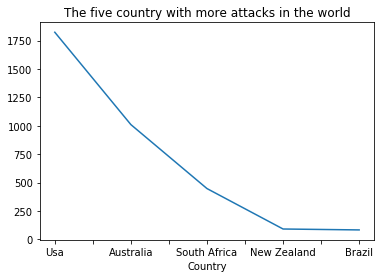

In [71]:
#Pivot Table Year country
country_year=sharks.pivot_table(index=sharks["Year"], columns=sharks["Country"], aggfunc="count")
country=country_year["Activity"].sum().sort_values(ascending=False).head()
country.plot(title="The five country with more attacks in the world")

Usa             1824
Australia       1011
South Africa     448
New Zealand       92
Brazil            84
Name: Country, dtype: int64


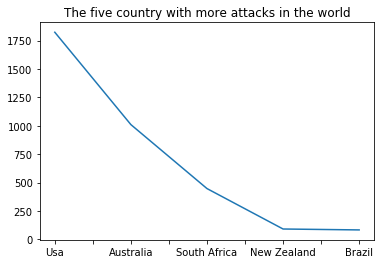

In [69]:
print(sharks['Country'].value_counts().head())

Countrys= sharks['Country'].value_counts().head()
Countrys.plot(title="The five country with more attacks in the world")

## how many attacks have been occurred in the last 20 years ?

2001.0     72
2002.0     79
2003.0     79
2004.0     79
2005.0     82
2006.0     85
2007.0     99
2008.0     98
2009.0    103
2010.0     89
2011.0    111
2012.0     99
2013.0    101
2014.0     95
2015.0    124
2016.0    112
2017.0    114
2018.0     46
Name: Years, dtype: int64


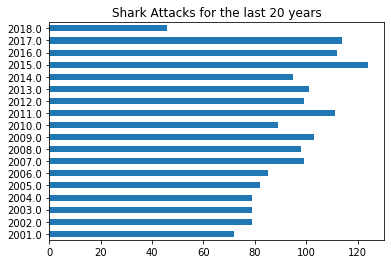

In [776]:
print(sharks['Years'].value_counts().sort_index())
sharks["Years"]=sharks[sharks["Year"] > 2000]["Year"]
Years= sharks['Years'].value_counts().sort_index()
Years.plot(title="Shark Attacks for the last 20 years", kind="barh")


## what is the sex with more sharks incidents?

M    3735
F     511
Name: Sex, dtype: int64


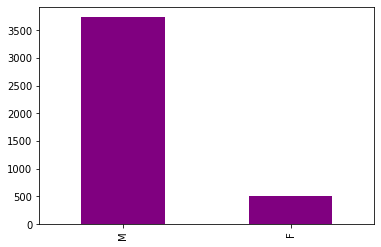

In [662]:
print(sharks['Sex'].value_counts())

sharks[sharks['Sex'].isin(['M','F'])]["Sex"].value_counts().plot.bar(color='purple')


In [769]:
Freq_act= sharks['Activity']
p=[]
for i in Freq_act:
    i=i.replace(","," ").replace(";"," ")
    i=i.replace(","," ").replace(";"," ")
    i=i.replace("  ", " ").replace("  "," ")
    p.extend(i.split())
p=pd.Series(p)


In [768]:
blacklist=["by","to","and","shark","no","from","of","the","on","fin","likely","caused","fin","calf","minor"
           ,"puncture","above","if","or","when","off","his","denfese","not","erroneously","lower","severe","feeding","against",
           "10-inch","a","board","lacerated","lacerations","in","laceration","2","3","severed","bit","hooked","was","he","with","severely","but","at",
           "punctures","back","provoked","incident","kayak","it","have","injured","injuries","recovered","surigcally",
           "survived","sharks","involvement","buttock","after","upper","small","multiple","below","later",
           "disappeared","cuts","abrasions","for","water","34'","field","Men","field","Mormackite","Carrie","POD)",
           "belived","woman","Trochus","details","steamships","(9)","4'","Technical","Fell","into","&","Free","/",
           "fish","capsized","Body","net","sea","Playing","near","trochus","fell","m","out"]
for i in blacklist:
    p.drop(p[p.values == i].index,inplace=True)


## Which are the five more popular activity that get an attack from a shark?

Surfing         949
Swimming        861
Fishing         375
Spearfishing    292
diving          225
dtype: int64


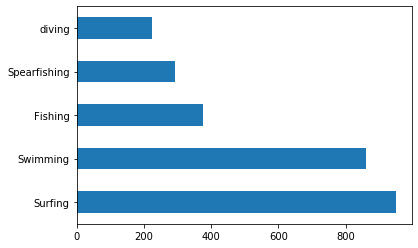

In [770]:
print(p.value_counts().head(5))
p.value_counts().head(5).plot(kind="barh")